# Synthetic 2 vertical bodies

This notebook creates 2 vertical bodies at different depths with magnetization using the polygonal prisms from fatiando and save its parameters in an outer file.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle

from fatiando import utils
from fatiando.gridder import regular
from fatiando.vis import myv
from matplotlib import colors, ticker, cm
from IPython.display import Image as img

### Auxiliary functions

In [31]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

### Creating the model

In [32]:
vbodies_model = dict()

In [33]:
# model parameters
vbodies_model['M'] = 20 # number of vertices per prism
vbodies_model['L'] = 2 # number of prisms
vbodies_model['P'] = vbodies_model['L']*(vbodies_model['M']+2) # number of parameters

vbodies_model['z0'] = 350.    # depth of the top the shallowest prism
vbodies_model['dz'] = 1200.    # thickness of each prism

vbodies_model['inc'] = -50.  # inclination
vbodies_model['dec'] = -23.   # declination
vbodies_model['intensity'] = 20. # intensity

vbodies_model['props']={'magnetization': utils.ang2vec(
    vbodies_model['intensity'], vbodies_model['inc'], vbodies_model['dec'])} # physical property: magnetization

r = np.zeros(vbodies_model['M']) + 1000. # radial distance for each vertice

# Cartesian coordinates of the origin of each prism
x0 = np.zeros(vbodies_model['L']) 
y0 = np.zeros(vbodies_model['L'])

l = []   # list of parameters of the prisms

for i in range(vbodies_model['L']):
    l.append([r + i*1000., x0[i] + i*500., y0[i] + i*500., vbodies_model['z0'] + (vbodies_model['dz'] + 2000.)*i,\
              vbodies_model['z0'] + (vbodies_model['dz'])*(i + 1)  + 4000.*i, vbodies_model['props']])
    
vbodies_model['prisms'] = mfun.pol2cart(l, vbodies_model['M'], vbodies_model['L'])
vbodies_model['param_vec'] = mfun.param_vec(l, vbodies_model['M'], vbodies_model['L'])

### Model ploting

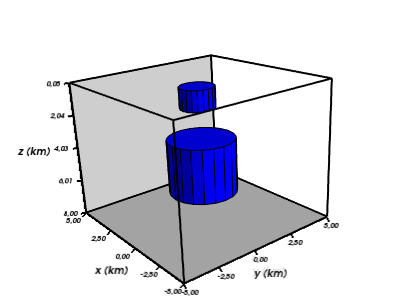

In [34]:
bounds = [-5000., 5000., -5000., 5000., 50., 8000.]

red, green, blue = (1, 0, 0), (0, 1, 0), (0, 0, 1)
white, black = (1, 1, 1), (0, 0, 0),

# Show the model
scene = myv.figure()
myv.polyprisms(vbodies_model['prisms'], 'magnetization', opacity=1., color=blue)

ax = myv.axes(myv.outline(bounds), ranges=[i * 0.001 for i in bounds])
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.65
scene.scene.camera.position = [-0.089204656936016313, -0.066107174155361687, -0.04083578885723696]
scene.scene.camera.focal_point = [1.1820671636724554e-16, 1.3134079596360617e-17, -1.9701119394540926e-17]
scene.scene.camera.view_angle = 30.0
scene.scene.camera.view_up = [0.24683390337942718, 0.24593292331329802, -0.93733132955911114]
scene.scene.camera.clipping_range = [0.057117737884348194, 0.1956040854922288]
scene.scene.camera.compute_view_plane_normal()

myv.wall_bottom(ax.axes.bounds, opacity=0.2)
myv.wall_north(ax.axes.bounds)

myv.savefig('../synthetic_data/vbodies/vbodies_true.png')
myv.show()
img(filename='../synthetic_data/vbodies/vbodies_true.png')

### Saving in an outer file

In [35]:
file_name = '../synthetic_data/vbodies/vbodies_model.pickle'
with open(file_name, 'w') as f:
    pickle.dump(vbodies_model, f)